In [1]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [2]:
import torchvision.datasets

In [3]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

Extracting ./MNIST\raw\train-images-idx3-ubyte.gz to ./MNIST\raw


Extracting ./MNIST\raw\train-labels-idx1-ubyte.gz to ./MNIST\raw


Extracting ./MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST\raw


Extracting ./MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST\raw
Processing...
Done!


In [20]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

C:\Users\moony\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
C:\Users\moony\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
C:\Users\moony\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\moony\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [21]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [22]:
X_train = X_train.float()

In [23]:
X_test = X_test.float()

In [24]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

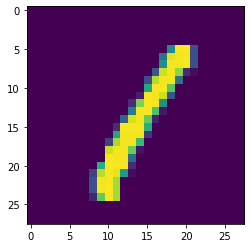

tensor(1)


In [25]:
import matplotlib.pyplot as plt
plt.imshow(X_train[3, :,:])
plt.show()
print(y_train[3])

In [26]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [34]:
class MNISTNet (torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)  
        return x

In [36]:
mnist_net = MNISTNet(100)

In [38]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

In [46]:
batch_size = 100
for epoch in range(100):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index: start_index+batch_size]
        X_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        preds = mnist_net.forward(X_batch)
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    test_preds = mnist_net.forward(X_test)
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    print(accuracy)

tensor(0.9286)
tensor(0.9288)
tensor(0.9337)
tensor(0.9327)
tensor(0.9378)
tensor(0.9384)
tensor(0.9361)
tensor(0.9318)
tensor(0.9350)
tensor(0.9366)
tensor(0.9380)
tensor(0.9423)
tensor(0.9439)
tensor(0.9427)
tensor(0.9391)
tensor(0.9426)
tensor(0.9421)
tensor(0.9391)
tensor(0.9389)
tensor(0.9425)
tensor(0.9443)
tensor(0.9478)
tensor(0.9440)
tensor(0.9465)
tensor(0.9423)
tensor(0.9463)
tensor(0.9485)
tensor(0.9462)
tensor(0.9502)
tensor(0.9477)
tensor(0.9485)
tensor(0.9476)
tensor(0.9548)
tensor(0.9492)
tensor(0.9493)
tensor(0.9523)
tensor(0.9503)
tensor(0.9521)
tensor(0.9540)
tensor(0.9521)
tensor(0.9527)
tensor(0.9546)
tensor(0.9528)
tensor(0.9562)
tensor(0.9518)
tensor(0.9547)
tensor(0.9542)
tensor(0.9556)
tensor(0.9579)
tensor(0.9553)
tensor(0.9536)
tensor(0.9505)
tensor(0.9516)
tensor(0.9524)
tensor(0.9508)
tensor(0.9528)
tensor(0.9544)
tensor(0.9540)
tensor(0.9580)
tensor(0.9560)
tensor(0.9581)
tensor(0.9542)
tensor(0.9543)
tensor(0.9543)
tensor(0.9565)
tensor(0.9563)
tensor(0.9